In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [2]:
model = Sequential()

model.add(Conv2D(32, (3,3) ,input_shape=(64, 64, 3), activation='relu')) #Convolution
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size= (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0

In [4]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [5]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.00005)

callbacks = [earlystop, learning_rate_reduction]

In [6]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.1,
                                      zoom_range=0.1,
                                      horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
training_set = training_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set', 
                                                    target_size=(64,64),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 8000 images belonging to 2 classes.


In [8]:
validation_set = validation_datagen.flow_from_directory('/content/drive/My Drive/dataset/test_set', 
                                                target_size=(64,64), 
                                                batch_size=32, 
                                                class_mode='categorical')

Found 1880 images belonging to 2 classes.


In [13]:
history = model.fit(
    training_set,
    steps_per_epoch=8000//32,
    epochs = 35,
    validation_data = validation_set,
    validation_steps=1880//32,
    callbacks=callbacks
)

Epoch 1/35
250/250 [==============================] - 49s 194ms/step - loss: 0.5535 - accuracy: 0.7184 - val_loss: 0.5150 - val_accuracy: 0.7559
Epoch 2/35
250/250 [==============================] - 49s 196ms/step - loss: 0.5266 - accuracy: 0.7380 - val_loss: 0.8603 - val_accuracy: 0.7349
Epoch 3/35
250/250 [==============================] - ETA: 0s - loss: 0.5267 - accuracy: 0.7385
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0007500000356230885.
250/250 [==============================] - 49s 194ms/step - loss: 0.5267 - accuracy: 0.7385 - val_loss: 0.5608 - val_accuracy: 0.7478
Epoch 4/35
250/250 [==============================] - 49s 195ms/step - loss: 0.4964 - accuracy: 0.7598 - val_loss: 0.4952 - val_accuracy: 0.7689
Epoch 5/35
250/250 [==============================] - 50s 199ms/step - loss: 0.4799 - accuracy: 0.7697 - val_loss: 0.4721 - val_accuracy: 0.7850
Epoch 6/35
250/250 [==============================] - 49s 195ms/step - loss: 0.4683 - accuracy: 0.7724 - val_l

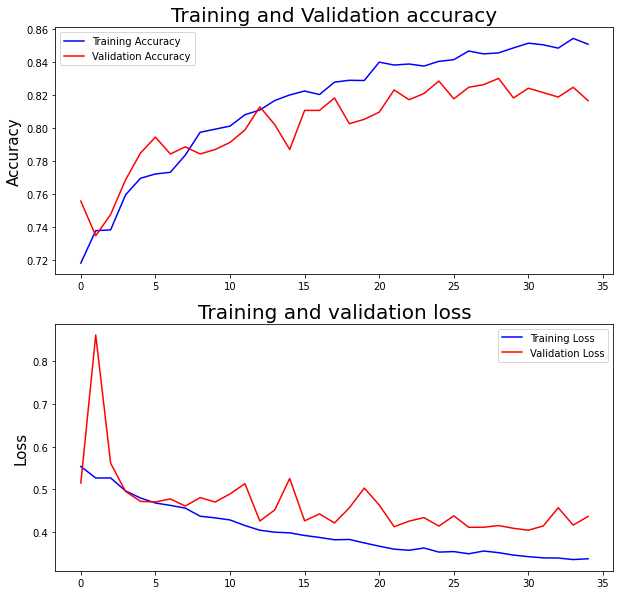

In [16]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10)) 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()

ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()

plt.show()

In [17]:
print("Accuracy Score:" , round(accuracy[-1]*100))

Accuracy Score: 85


In [18]:
model.save('MODEL.h5')